# Glass Classification & Clustering (Unsupervised Learning)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('glass.csv')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Descriptive Analytics

In [5]:
df.shape

(214, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [10]:
df['Type'] = df['Type'].astype(object)

In [12]:
df.describe().T   ##Quantitative Variables Summary

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [14]:
df.describe(include=object).T

,count,unique,top,freq
Type,214,6,2,76


In [16]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [17]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
#No null and missing values

In [21]:
df.dtypes[df.dtypes!=object].index

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

RI


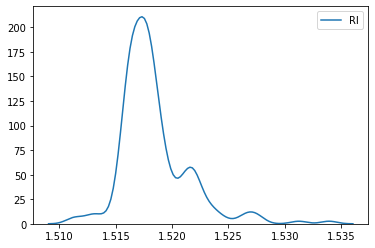

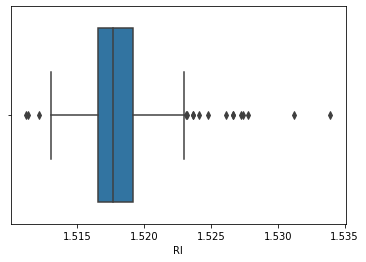

Na


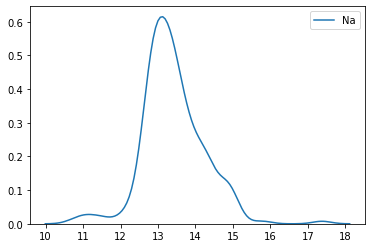

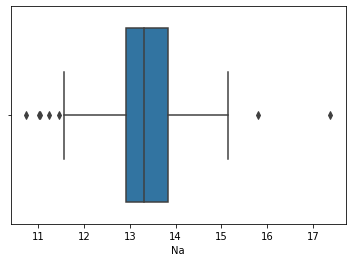

Mg


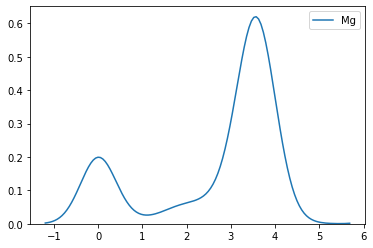

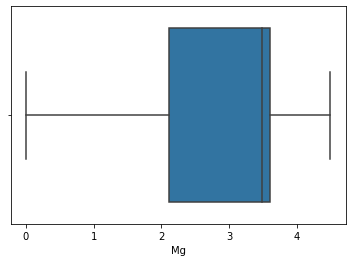

Al


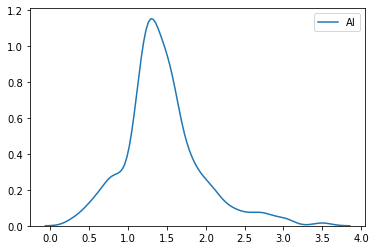

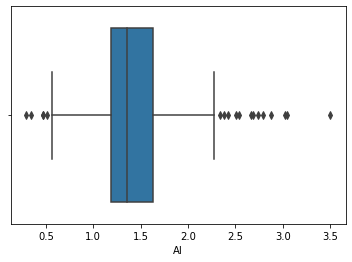

Si


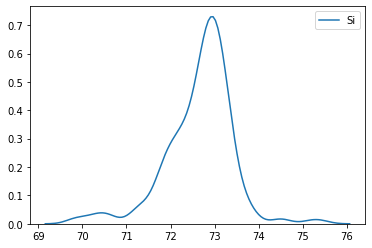

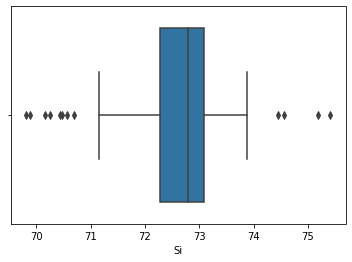

K


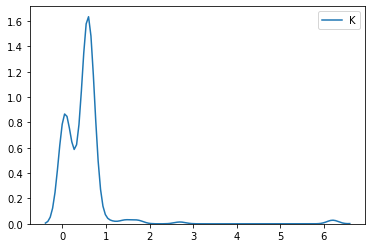

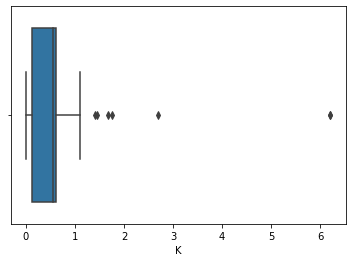

Ca


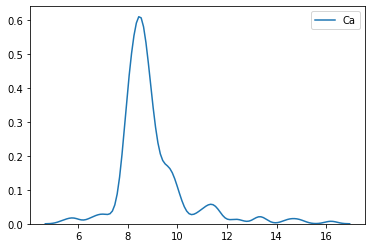

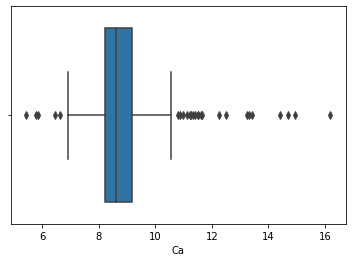

Ba


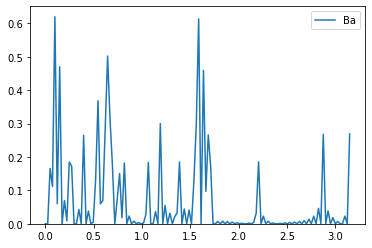

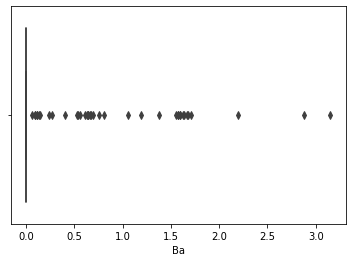

Fe


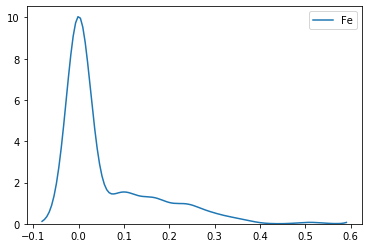

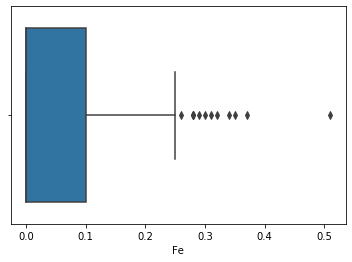

In [23]:
##Boxplot and KDEplot for quantitative variables
for i in list(df.dtypes[df.dtypes!=object].index):
    print(i)
    sns.kdeplot(df[i])
    plt.show()
    sns.boxplot(df[i])
    plt.show()

In [27]:
df['Ca']

0      8.75
1      7.83
2      7.78
3      8.22
4      8.07
       ... 
209    9.18
210    8.40
211    8.44
212    8.48
213    8.62
Name: Ca, Length: 214, dtype: float64

In [29]:
df['Fe'].value_counts()

0.00    144
0.17      7
0.24      7
0.09      6
0.10      5
0.11      4
0.07      3
0.14      3
0.28      3
0.16      3
0.12      3
0.22      3
0.19      2
0.08      2
0.15      2
0.21      1
0.29      1
0.25      1
0.34      1
0.03      1
0.32      1
0.26      1
0.31      1
0.18      1
0.06      1
0.20      1
0.05      1
0.37      1
0.30      1
0.51      1
0.01      1
0.35      1
Name: Fe, dtype: int64

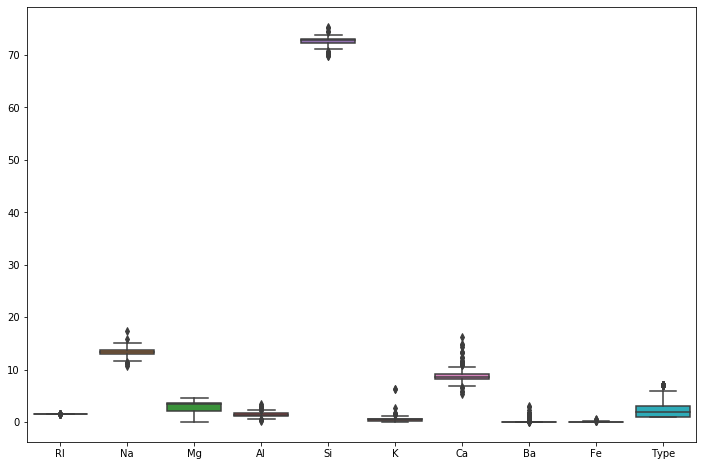

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

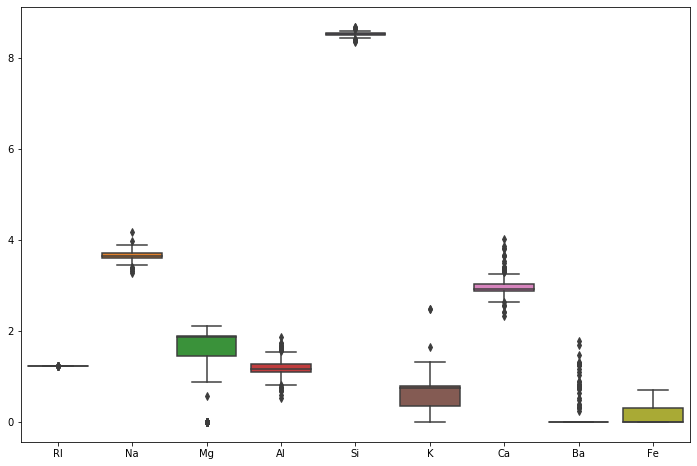

In [35]:
##Trying out if transformation removes outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df.drop(columns='Type')))

RI


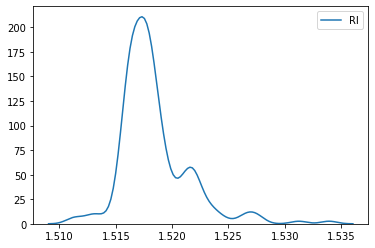

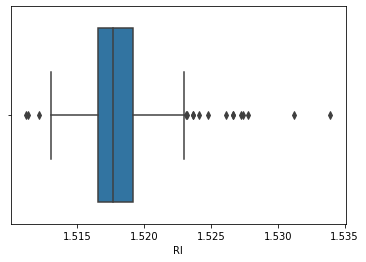

Na


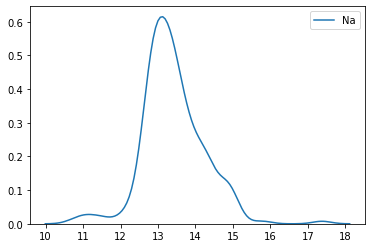

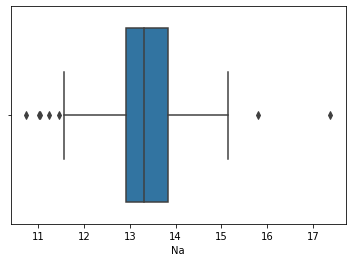

Mg


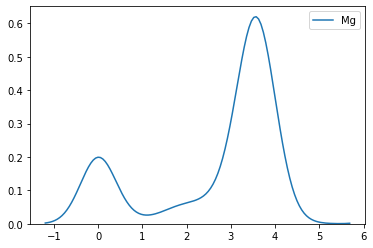

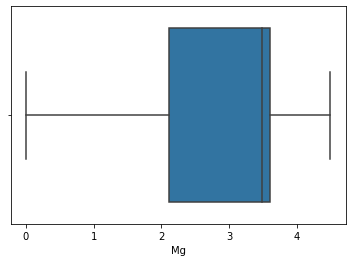

Al


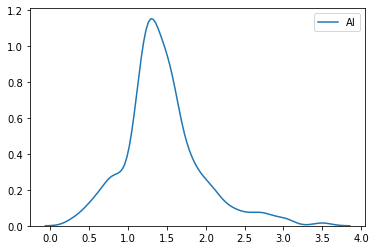

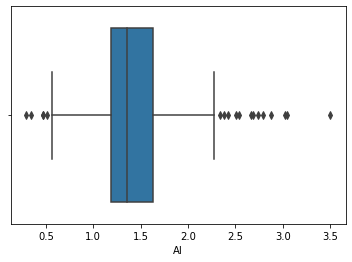

Si


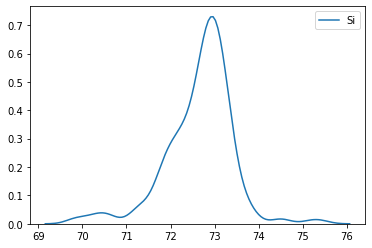

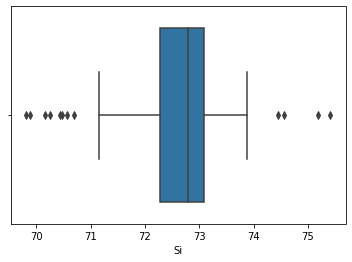

K


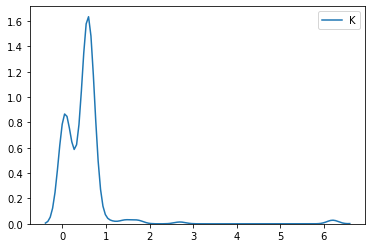

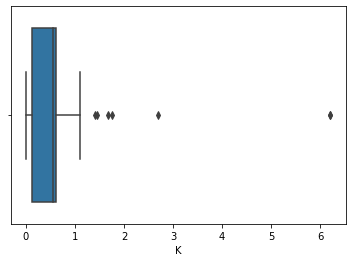

Ca


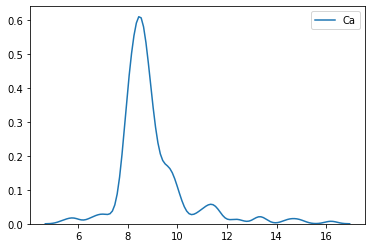

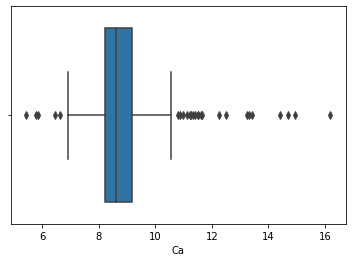

Ba


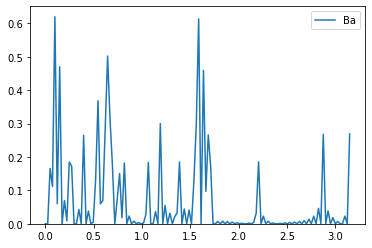

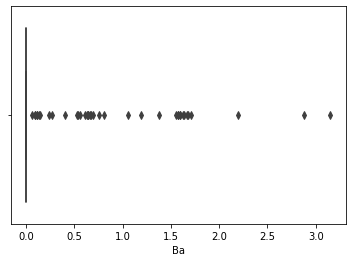

Fe


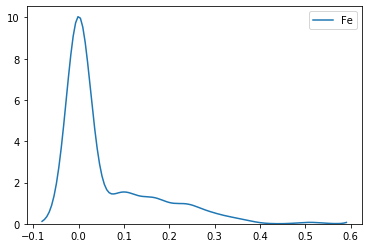

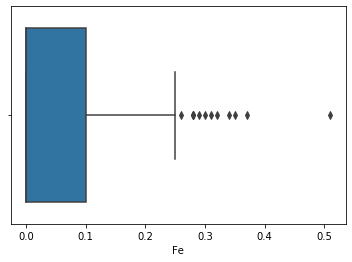

In [37]:
##Boxplot and KDEplot for quantitative variables
for i in np.sqrt(df.drop(columns='Type')).columns:
    print(i)
    sns.kdeplot(df[i])
    plt.show()
    sns.boxplot(df[i])
    plt.show()

In [11]:
#Transformation does make the data look cleaner and includes outliers in most cases, so we might consider it

Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
dtype: int64

In [ ]:
##working on Ca and Fe

In [39]:
df1 = df[['Ca','Fe']]

Ca


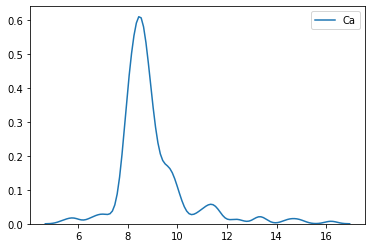

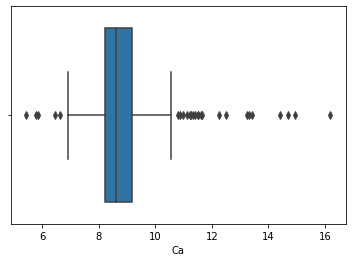

Fe


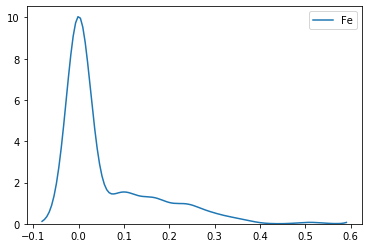

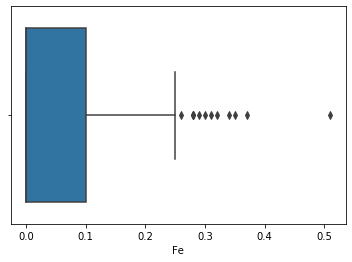

In [40]:
##Boxplot and KDEplot for quantitative variables
for i in df1.columns:
    print(i)
    sns.kdeplot(df1[i])
    plt.show()
    sns.boxplot(df1[i])
    plt.show()

In [ ]:
##Let's transform and check:

Ca


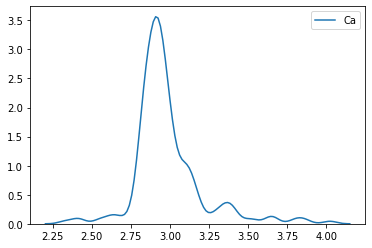

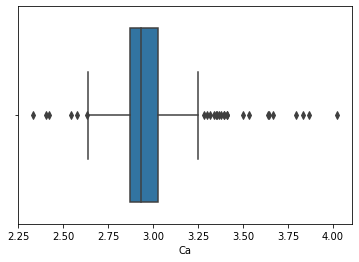

Fe


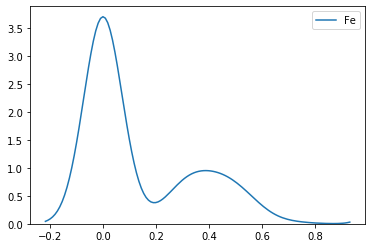

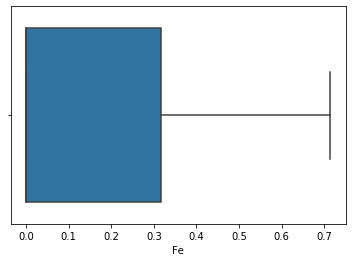

In [44]:
##Boxplot and KDEplot for quantitative variables
for i in np.sqrt(df1).columns:
    print(i)
    sns.kdeplot(np.sqrt(df1[i]))
    plt.show()
    sns.boxplot(np.sqrt(df1[i]))
    plt.show()

In [ ]:
##So, we can use the trasnformed data, as all outliers were removed from Fe

In [45]:
df1 = np.sqrt(df1)

In [ ]:
#Our data still has outliers, so we will remove it from Ca

In [46]:
q1 = df1['Ca'].quantile(0.25)
q3 = df1['Ca'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Ca']>ll)&(df1['Ca']<ul)]

In [47]:
df2.head()

,Ca,Fe
0,2.958040,0.0
1,2.798214,0.0
2,2.789265,0.0
3,2.867054,0.0
4,2.840775,0.0


Ca


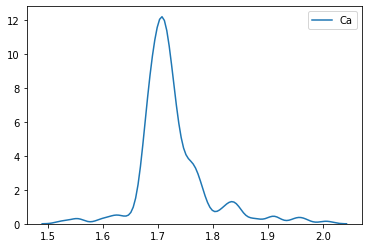

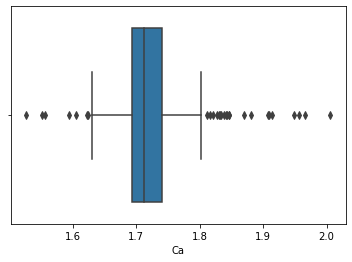

Fe


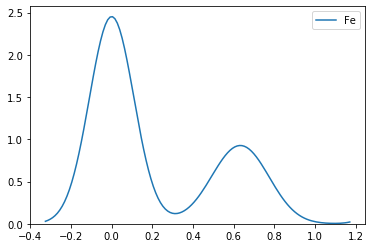

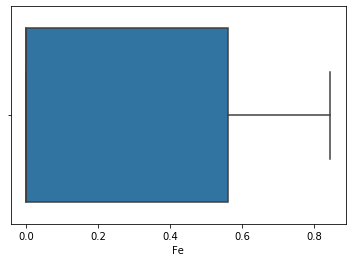

In [48]:
##Boxplot and KDEplot for quantitative variables
for i in df2.columns:
    print(i)
    sns.kdeplot(np.sqrt(df1[i]))
    plt.show()
    sns.boxplot(np.sqrt(df1[i]))
    plt.show()

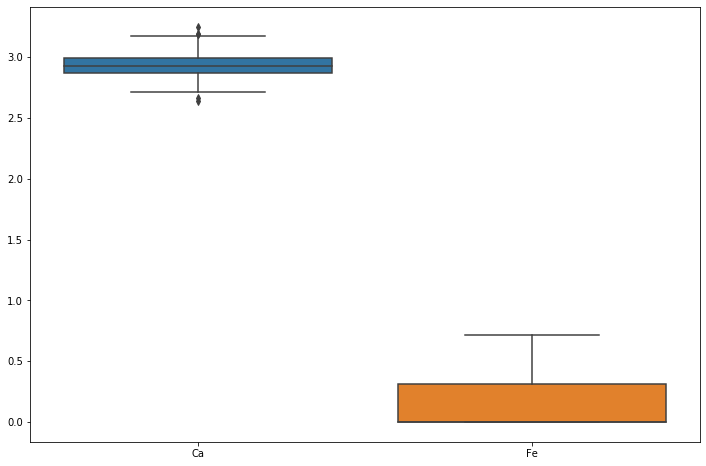

In [49]:
plt.figure(figsize=(12,8)) ##Checking boxplots for Ca and Fe
sns.boxplot(data=df2)

In [33]:
##We need to normalize the data now: 

In [50]:
##As we can see above, we need to normalize data:

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df2)

In [53]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,374.000000
1,2,200.922670
2,3,117.633995
3,4,83.176840
4,5,57.614904
5,6,46.177169
6,7,40.242803
7,8,33.805479
8,9,28.743103
9,10,24.648907


Text(0, 0.5, 'Cluster Errors')

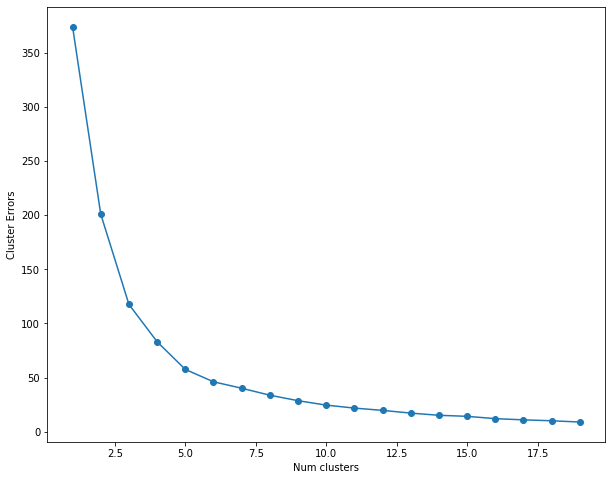

In [54]:
#Elbow plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

In [ ]:
##We can consider 4 or 5 optimum clusters from the above Elbow Curve

In [55]:
##Taking 4 optimum clusters, we can build a model using Ca and Fe

In [ ]:
##Using distance techniques between Ca and Fe:

In [61]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [62]:
df[['Ca','Fe']].corr() ## We see Ca and Fe have very low correlation and they were far apart when it came to boxplots above
#as well

,Ca,Fe
Ca,1.000000,0.124968
Fe,0.124968,1.000000


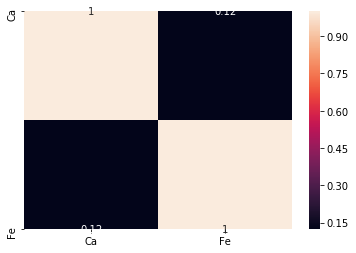

In [63]:
sns.heatmap(df[['Ca','Fe']].corr(),annot=True)

In [68]:
import scipy.spatial.distance as sd
print(sd.euclidean(df['Ca'],df['Fe']))
print(sd.chebyshev(df['Ca'],df['Fe']))
print(sd.cosine(df['Ca'],df['Fe']))

131.8211094627867
15.950000000000001
0.483485144954364


In [ ]:
##The above metrics show us that there isn't much similarity between Ca and Fe

In [ ]:
#SECTION B: 10 MARKS
#Q2.1: Drop the target column (TYPE) and Perform K-means Clustering and find the optimum number of
#clusters using Elbow curve. Plot the clusters using any two columns of your choice. (5 marks)

In [64]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# K-Means Clustering


In [70]:
df1 = df.drop(columns='Type')

In [71]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


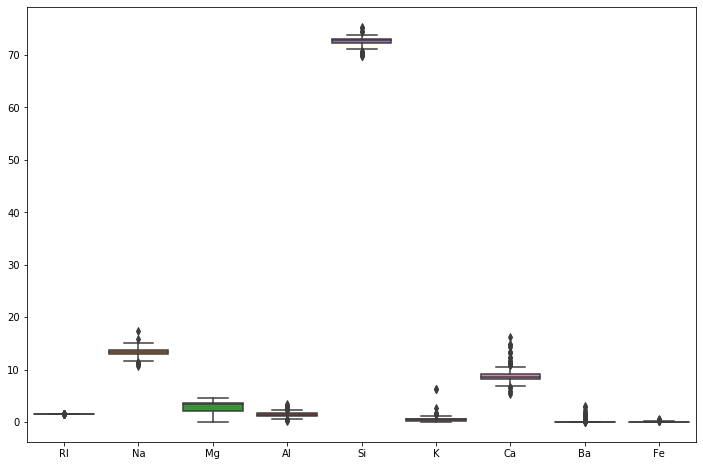

In [72]:
plt.figure(figsize=(12,8)) 
sns.boxplot(data=df1)

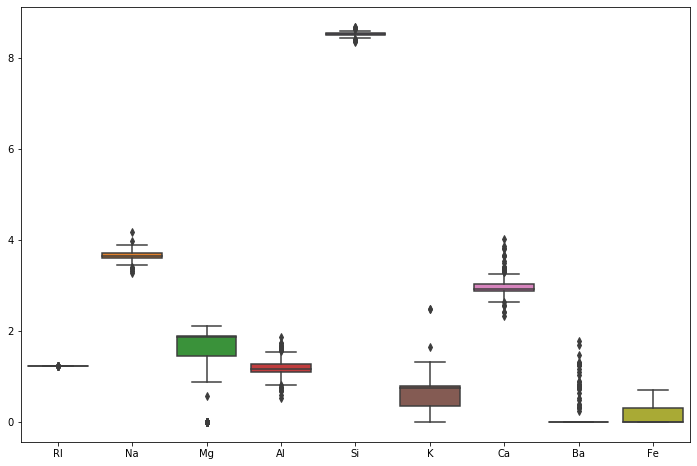

In [74]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df1))

In [ ]:
##Using transformed DF as it includes outliers

In [75]:
df1 = np.sqrt(df1)

RI


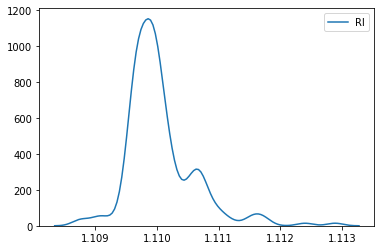

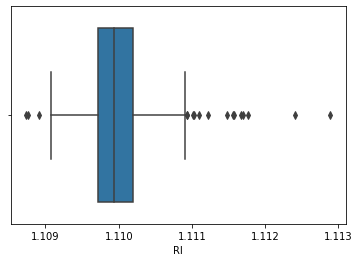

Na


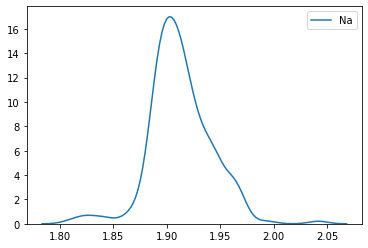

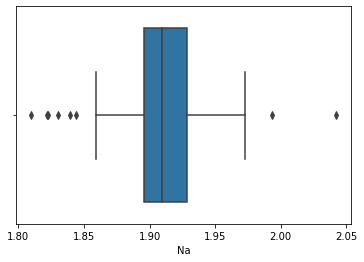

Mg


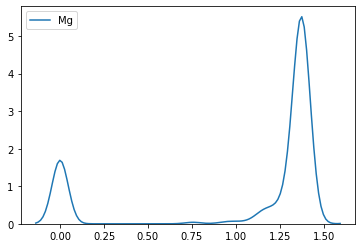

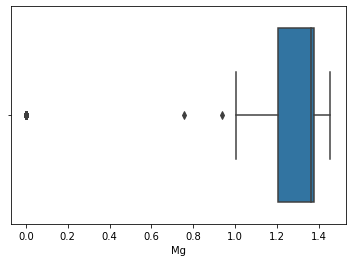

Al


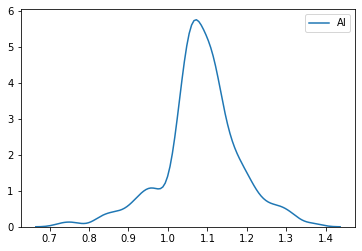

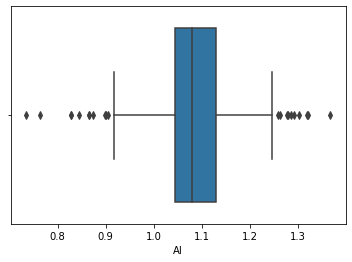

Si


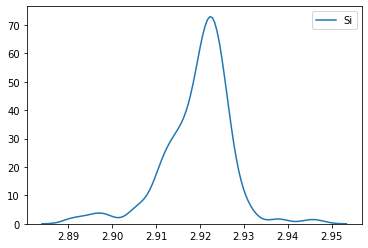

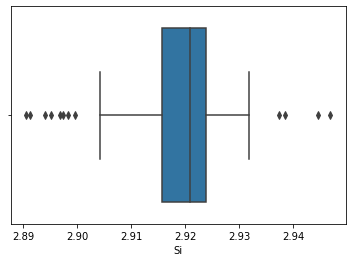

K


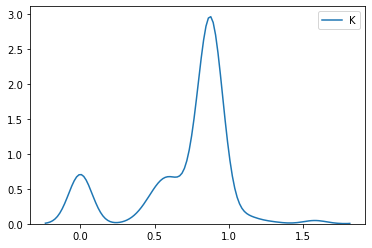

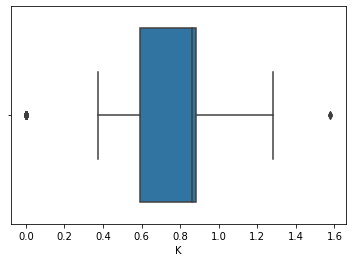

Ca


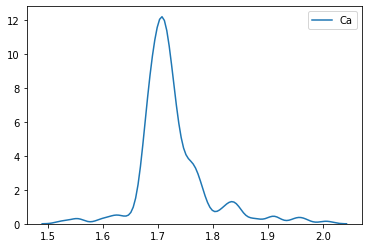

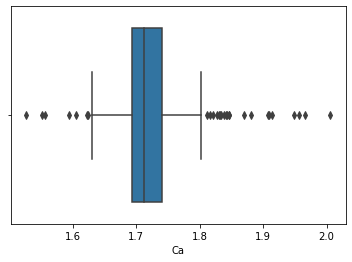

Ba


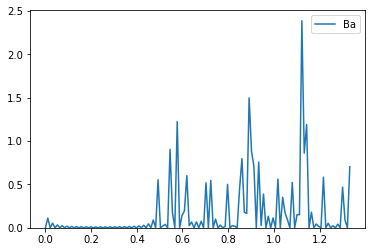

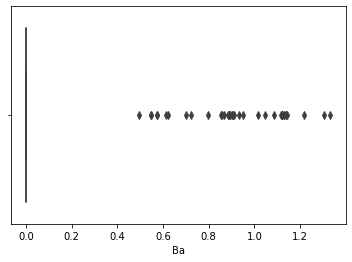

Fe


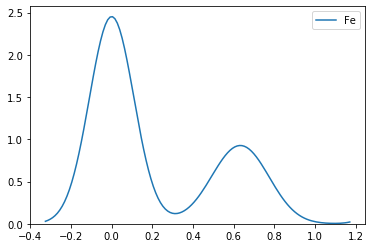

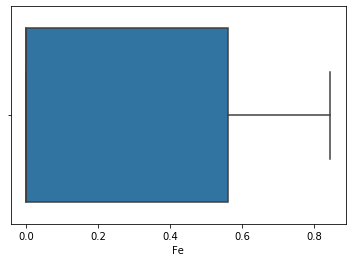

In [76]:
##Boxplot and KDEplot for quantitative variables
for i in df1.columns:
    print(i)
    sns.kdeplot(np.sqrt(df1[i]))
    plt.show()
    sns.boxplot(np.sqrt(df1[i]))
    plt.show()

In [ ]:
##Removing outliers from Ca

In [77]:
q1 = df1['Ca'].quantile(0.25)
q3 = df1['Ca'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Ca']>ll)&(df1['Ca']<ul)]

RI


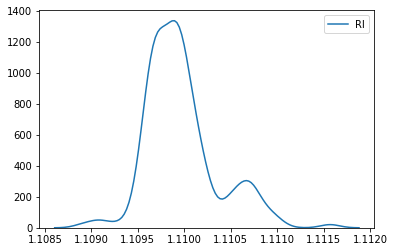

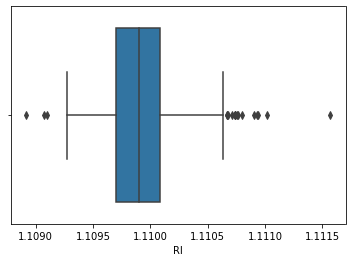

Na


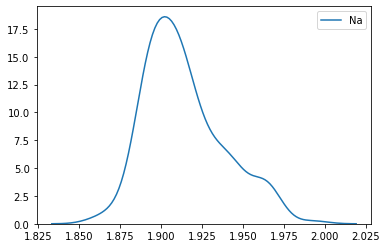

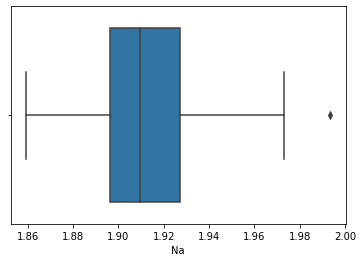

Mg


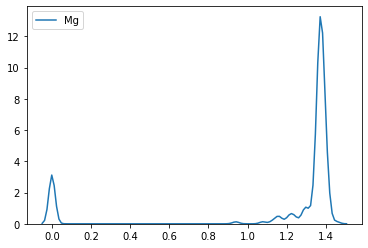

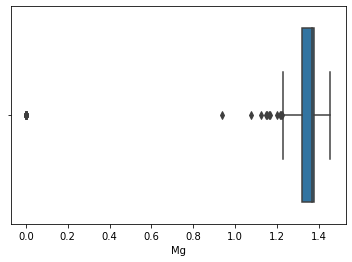

Al


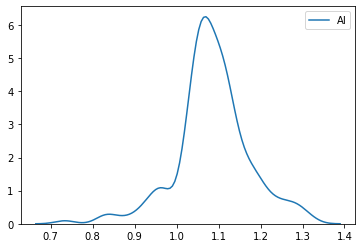

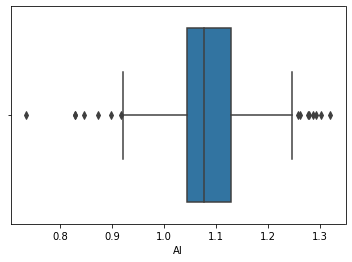

Si


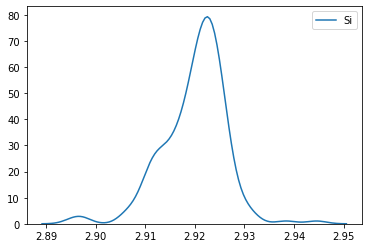

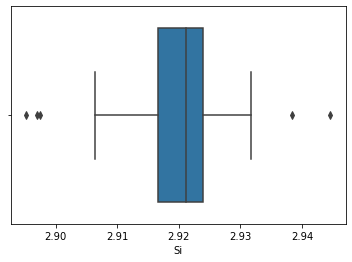

K


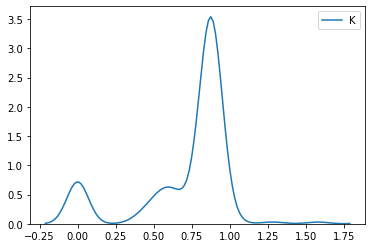

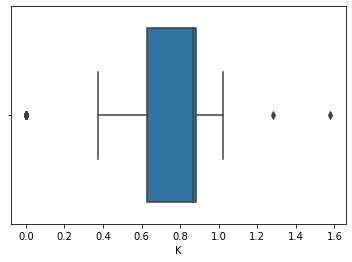

Ca


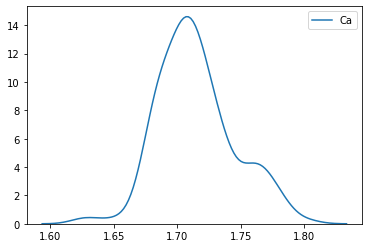

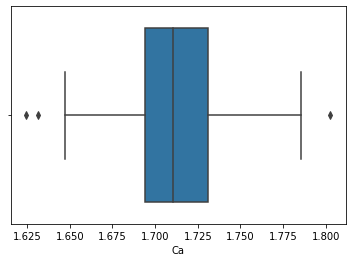

Ba


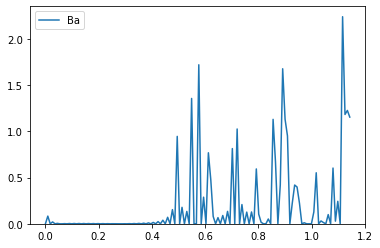

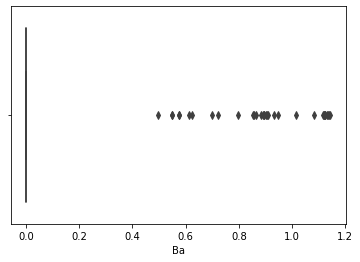

Fe


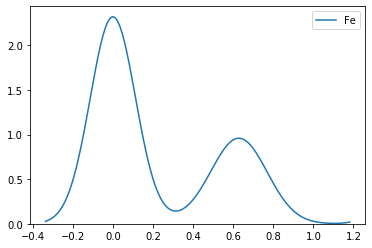

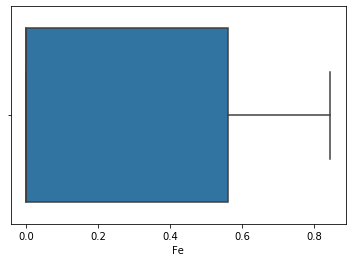

In [78]:
##Boxplot and KDEplot for quantitative variables
for i in df2.columns:
    print(i)
    sns.kdeplot(np.sqrt(df2[i]))
    plt.show()
    sns.boxplot(np.sqrt(df2[i]))
    plt.show()

In [79]:
#Removing outliers from Ba
q1 = df2['Ba'].quantile(0.25)
q3 = df2['Ba'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['Ba']>ll)&(df2['Ba']<ul)]

RI


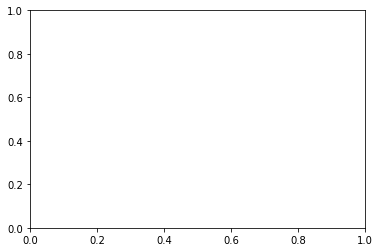

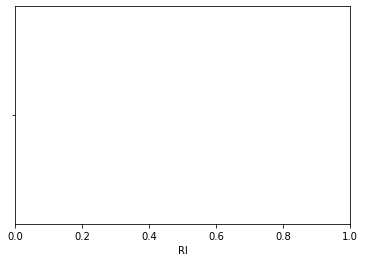

Na


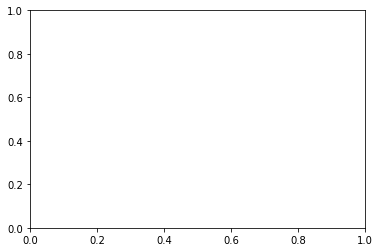

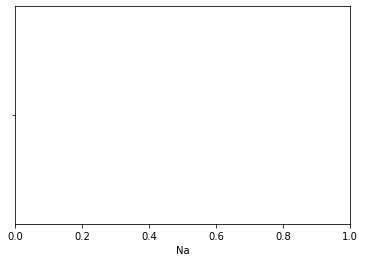

Mg


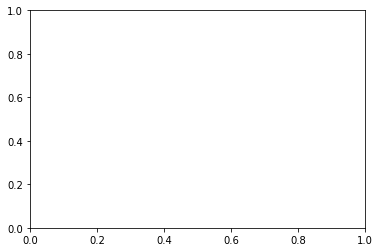

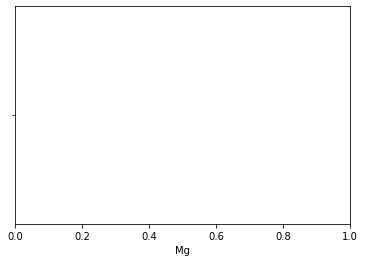

Al


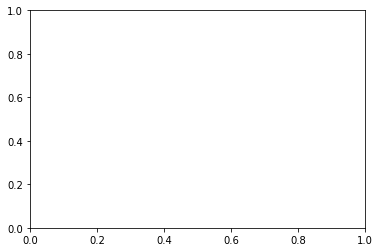

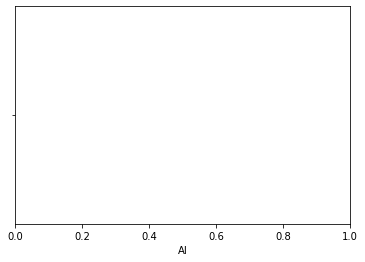

Si


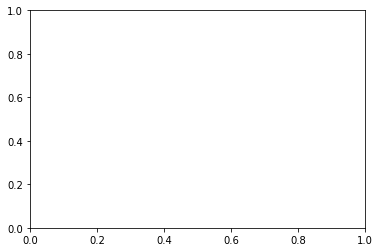

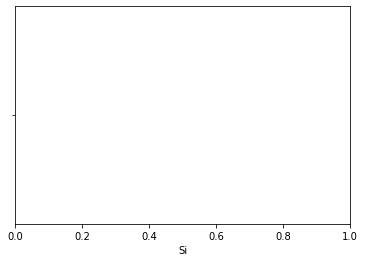

K


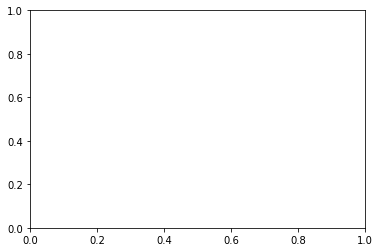

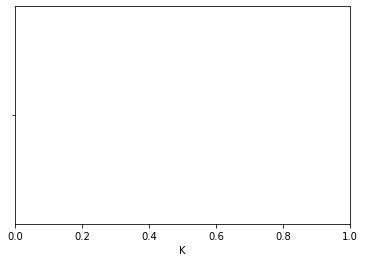

Ca


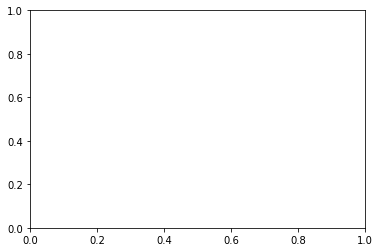

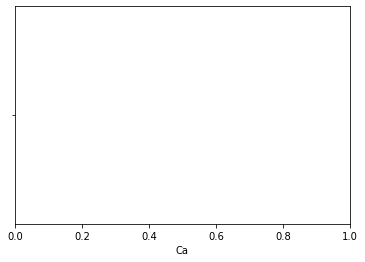

Ba


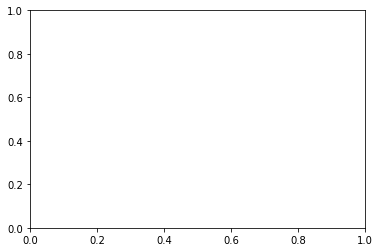

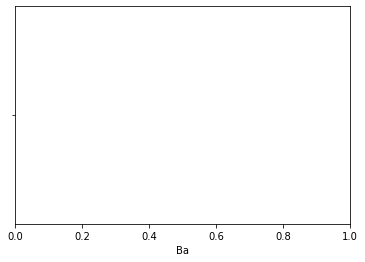

Fe


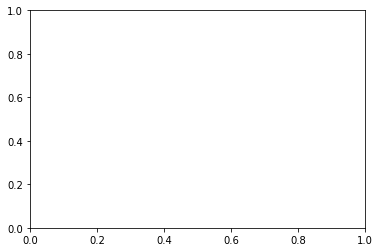

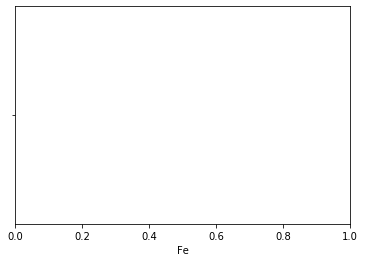

In [80]:
##Boxplot and KDEplot for quantitative variables
for i in df3.columns:
    print(i)
    sns.kdeplot(np.sqrt(df3[i]))
    plt.show()
    sns.boxplot(np.sqrt(df3[i]))
    plt.show()

In [57]:
##since Removing Ba's outlliers is removing the data, we will still with df2

In [81]:
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.233292,3.693237,2.118962,1.048809,8.472308,0.244949,2.958040,0.0,0.0
1,1.231913,3.726929,1.897367,1.166190,8.528189,0.692820,2.798214,0.0,0.0
2,1.231333,3.678315,1.884144,1.240967,8.543419,0.624500,2.789265,0.0,0.0
3,1.231933,3.634556,1.920937,1.135782,8.521150,0.754983,2.867054,0.0,0.0
4,1.231836,3.642801,1.902630,1.113553,8.548684,0.741620,2.840775,0.0,0.0


In [82]:
##We need to normalize the data now: 

In [83]:
##As we can see above, we need to normalize data:

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df2)

In [84]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,1683.000000
1,2,1143.223832
2,3,801.216260
3,4,666.987476
4,5,597.928146
5,6,548.887218
6,7,514.044052
7,8,464.825731
8,9,435.904128
9,10,412.063840


Text(0, 0.5, 'Cluster Errors')

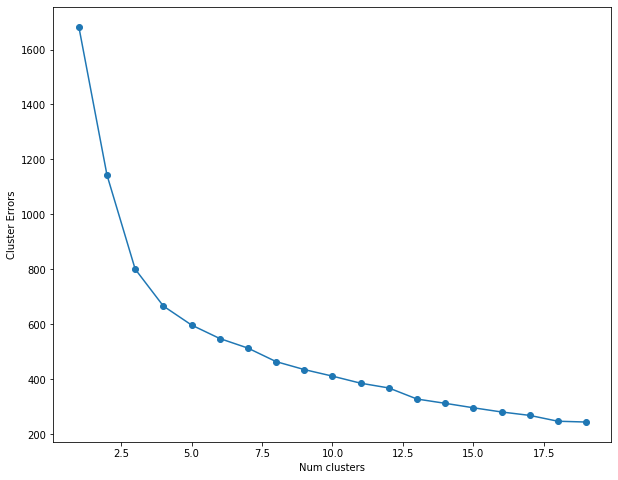

In [85]:
#Elbow plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

In [ ]:
##We see 4 as the optimum number of cluster, and now we will fit the model

In [86]:
model1 = KMeans(n_clusters = 4, max_iter=50)
model1.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
df2.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [89]:
#analysis of clusters formed

df2.index = pd.RangeIndex(len(df2.index))
df_km = pd.concat([df2,pd.Series(model1.labels_)],axis=1)
df_km.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Cluster']

In [90]:
df_km.isna().sum()

RI         0
Na         0
Mg         0
Al         0
Si         0
K          0
Ca         0
Ba         0
Fe         0
Cluster    0
dtype: int64

In [91]:
df_km

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Cluster
0,1.233292,3.693237,2.118962,1.048809,8.472308,0.244949,2.958040,0.000000,0.0,0
1,1.231913,3.726929,1.897367,1.166190,8.528189,0.692820,2.798214,0.000000,0.0,3
2,1.231333,3.678315,1.884144,1.240967,8.543419,0.624500,2.789265,0.000000,0.0,3
3,1.231933,3.634556,1.920937,1.135782,8.521150,0.754983,2.867054,0.000000,0.0,3
4,1.231836,3.642801,1.902630,1.113553,8.548684,0.741620,2.840775,0.000000,0.0,3
...,...,...,...,...,...,...,...,...,...,...
182,1.231353,3.760319,0.000000,1.697056,8.521150,0.282843,3.029851,1.029563,0.0,2
183,1.231605,3.862642,0.000000,1.410674,8.547514,0.000000,2.898275,1.260952,0.0,2
184,1.233146,3.789459,0.000000,1.421267,8.568547,0.000000,2.905168,1.280625,0.0,2
185,1.231467,3.792097,0.000000,1.392839,8.579627,0.000000,2.912044,1.252996,0.0,2


In [93]:
df2.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

# Interpretations using Cluster Means

In [95]:
##Choosing columns Na and Mg for analysis
km_cluster_Na = pd.DataFrame(df_km.groupby('Cluster')['Na'].mean())
km_cluster_Mg = pd.DataFrame(df_km.groupby('Cluster')['Mg'].mean())



df = pd.concat([pd.Series([0,1,2,3]),km_cluster_Na,
km_cluster_Mg],axis=1)
df.columns = ['Cluster','Na','Mg']
df

,Cluster,Na,Mg
0,0,3.733362,1.774414
1,1,3.615423,1.855247
2,2,3.815798,0.060644
3,3,3.624614,1.792869


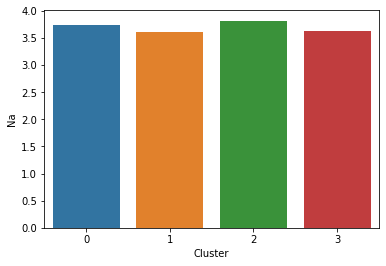

In [96]:
sns.barplot(data=df,x='Cluster',y='Na')

In [47]:
#Glasses in the all the clusters have almost the same mean value of Na, 0 and 1 having just a bit higher than that of 1 and 3

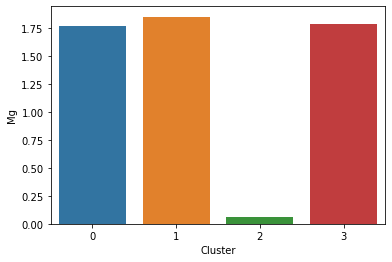

In [97]:
sns.barplot(data=df,x='Cluster',y='Mg')

In [49]:
#Cluster 2 contains glasses which have the least value of Na in their material

In [ ]:
##We can see that Cluster 2 is the one that has almost the same value of Mg in it's material but it has an extremely low value
#of Na in its material ,and this is of a very high significance, as we can notice that the other clusters have
#almost similar values of Na and Mg

In [ ]:
##Visualizing Clusters: Na and Mg

In [102]:
df4 = df2[['Na','Mg']]

In [103]:
##As we can see above, we need to normalize data:

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df4)

In [104]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,374.000000
1,2,136.409673
2,3,78.021003
3,4,56.641546
4,5,37.091819
5,6,29.033981
6,7,24.572195
7,8,20.639057
8,9,17.930246
9,10,14.766029


Text(0, 0.5, 'Cluster Errors')

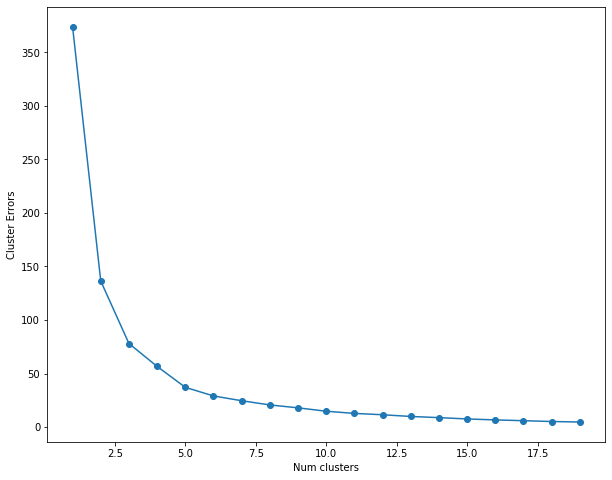

In [105]:
#Elbow plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

In [ ]:
##We see 3 as the optimum number of cluster, and now we will fit the model

In [106]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(df4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [107]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
 random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [108]:
Kmean.cluster_centers_

array([[3.78638546, 0.        ],
       [3.63686903, 1.88057429],
       [3.75119611, 1.37099324]])

In [109]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


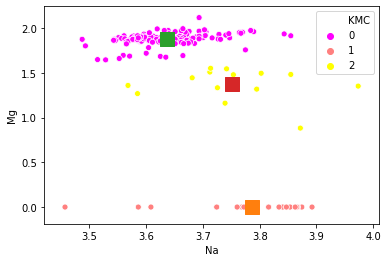

In [110]:
df4['KMC'] = Kmean.fit_predict(df4[['Na','Mg']])
sns.scatterplot(x='Na',y='Mg',hue='KMC',data=df4,palette='spring')
plt.scatter(3.78638546, 0, s=200, marker='s')
plt.scatter(3.63686903, 1.88057429, s=200, marker='s')
plt.scatter(3.75119611, 1.37099324, s=200, marker='s')
plt.show()

# Hierarchical Clustering (Dendrogram)

In [111]:
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

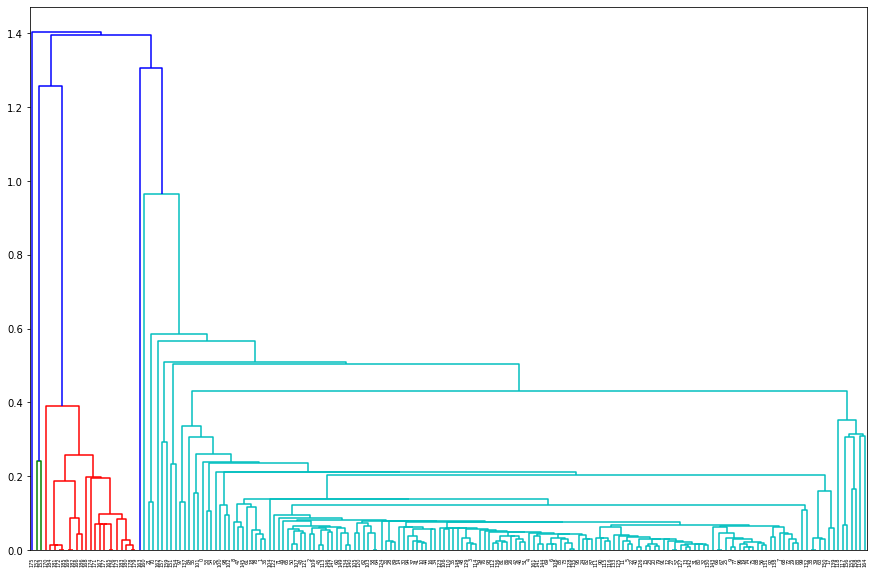

In [113]:
#Hierarchial Clustering: For all the variables
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

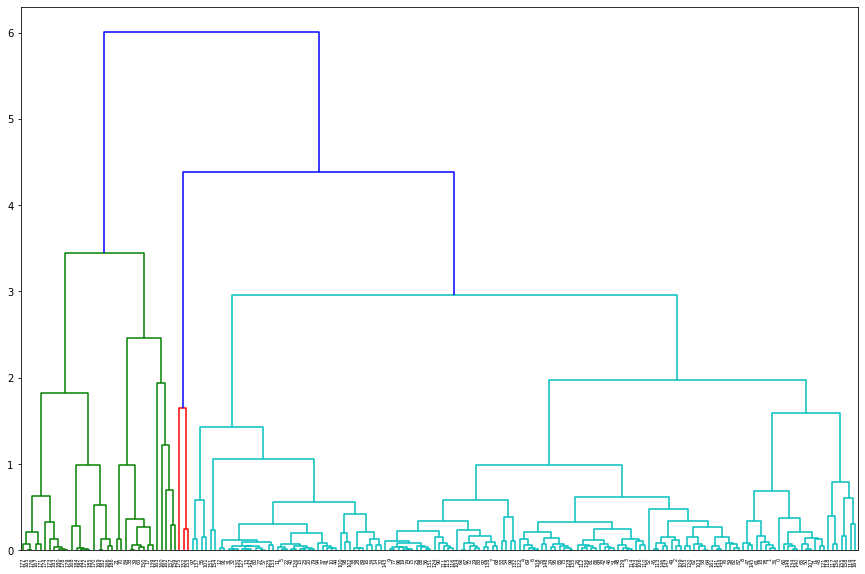

In [114]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

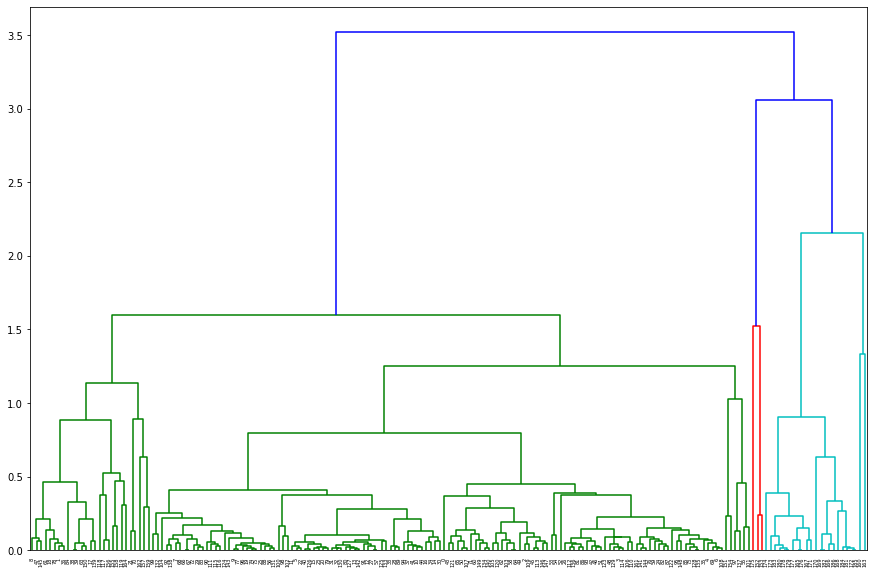

In [115]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
##Average and Complete Linkages tell that the optinum number of clusters would be 2, and we can visualize that using the
#dedrogram: the longest linkages are seen when there is a good amount of distance between the clusters, and that is what we want
#so, we will go ahead with 2 clusters
#Average looks to be the best method since it shows the longer and shorter linkages properly

In [ ]:
##plotting two clusters using Na and Mg

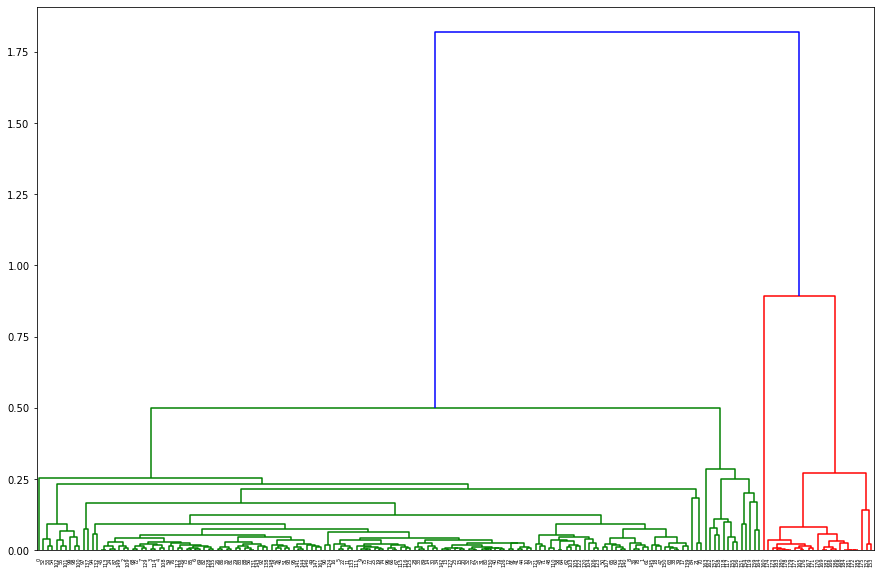

In [122]:
plt.figure(figsize=(15,10))
mergings = linkage(df4[['Na','Mg']], method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

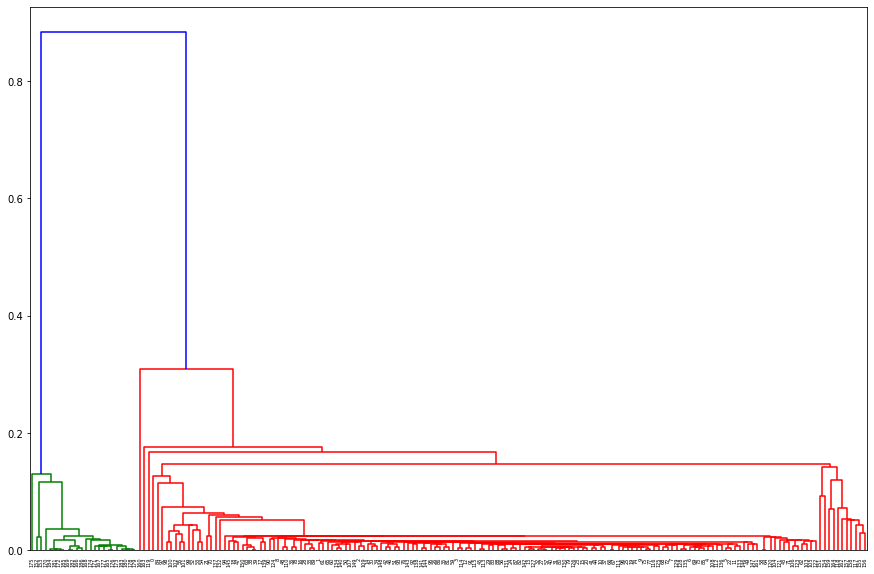

In [123]:
#Hierarchial Clustering: For Na and Mg
plt.figure(figsize=(15,10))
mergings = linkage(df4[['Na','Mg']], method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

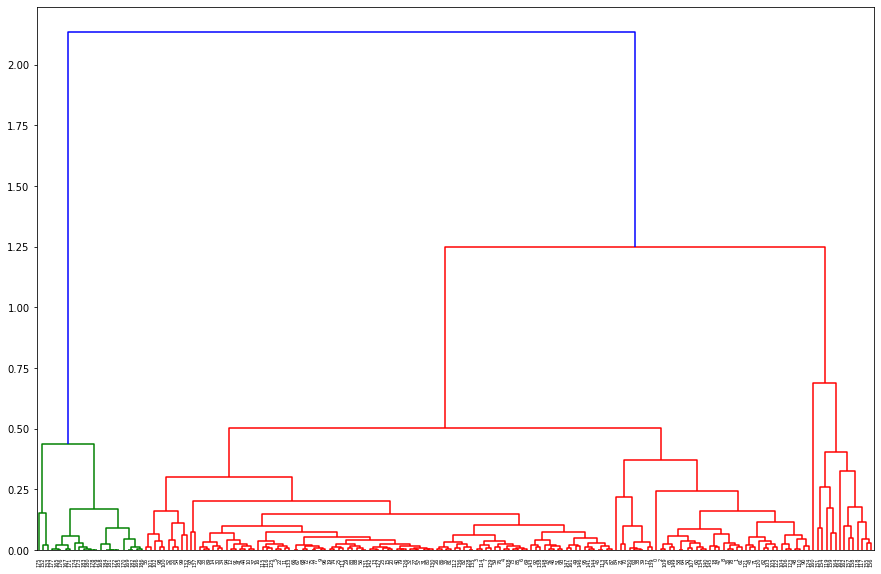

In [124]:
plt.figure(figsize=(15,10))
mergings = linkage(df4[['Na','Mg']], method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
##We see that for just two variables, Na and Mg, it is easier to visualize the dedrograms, and here we see that all the
#three methods easily point towards 2 clusters as optimum, since the linkages are longer for 2 optimum clusters

# Model Building

In [2]:
#Without PCA

In [129]:
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.233292,3.693237,2.118962,1.048809,8.472308,0.244949,2.958040,0.0,0.0
1,1.231913,3.726929,1.897367,1.166190,8.528189,0.692820,2.798214,0.0,0.0
2,1.231333,3.678315,1.884144,1.240967,8.543419,0.624500,2.789265,0.0,0.0
3,1.231933,3.634556,1.920937,1.135782,8.521150,0.754983,2.867054,0.0,0.0
4,1.231836,3.642801,1.902630,1.113553,8.548684,0.741620,2.840775,0.0,0.0


In [138]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rfc =  RandomForestClassifier()
lgbc = lgb.LGBMClassifier()

In [260]:
##Defining model function:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score,roc_curve
def model_compare(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    ypred_train = algo.predict(xtrain)
    ypred_test = algo.predict(xtest)
    
    yprob_train = algo.predict_proba(xtrain)[:,1]
    yprob_test = algo.predict_proba(xtest)[:,1]
    
    print('Accuracy on Train Set',accuracy_score(ytrain,ypred_train))
    print('Accuracy on Test Set',accuracy_score(ytest,ypred_test))

    

In [261]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.233292,3.693237,2.118962,1.048809,8.472308,0.244949,2.958040,0.000000,0.0
1,1.231913,3.726929,1.897367,1.166190,8.528189,0.692820,2.798214,0.000000,0.0
2,1.231333,3.678315,1.884144,1.240967,8.543419,0.624500,2.789265,0.000000,0.0
3,1.231933,3.634556,1.920937,1.135782,8.521150,0.754983,2.867054,0.000000,0.0
4,1.231836,3.642801,1.902630,1.113553,8.548684,0.741620,2.840775,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.231353,3.760319,0.000000,1.697056,8.521150,0.282843,3.029851,1.029563,0.0
210,1.231605,3.862642,0.000000,1.410674,8.547514,0.000000,2.898275,1.260952,0.0
211,1.233146,3.789459,0.000000,1.421267,8.568547,0.000000,2.905168,1.280625,0.0
212,1.231467,3.792097,0.000000,1.392839,8.579627,0.000000,2.912044,1.252996,0.0


In [262]:
df5 = pd.read_csv('glass.csv')

In [263]:
df5['Type'].shape

(214,)

In [264]:
df1.shape

(214, 9)

In [265]:
import statsmodels.api as sm
X = df1  ##FUll independant variables data
y = df5['Type'] ##Full dependant data
X1 = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [266]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=10)

In [267]:
model_compare(lr,X_train,X_test,y_train,y_test)

Accuracy on Train Set 0.6241610738255033
Accuracy on Test Set 0.5076923076923077


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [268]:
model_compare(dt,X_train,X_test,y_train,y_test)

Accuracy on Train Set 1.0
Accuracy on Test Set 0.5076923076923077


In [269]:
model_compare(lgbc,X_train,X_test,y_train,y_test)

Accuracy on Train Set 1.0
Accuracy on Test Set 0.5692307692307692


In [270]:
model_compare(rfc,X_train,X_test,y_train,y_test)

Accuracy on Train Set 0.9731543624161074
Accuracy on Test Set 0.5230769230769231


In [271]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.233292,3.693237,2.118962,1.048809,8.472308,0.244949,2.958040,0.000000,0.0
1,1.231913,3.726929,1.897367,1.166190,8.528189,0.692820,2.798214,0.000000,0.0
2,1.231333,3.678315,1.884144,1.240967,8.543419,0.624500,2.789265,0.000000,0.0
3,1.231933,3.634556,1.920937,1.135782,8.521150,0.754983,2.867054,0.000000,0.0
4,1.231836,3.642801,1.902630,1.113553,8.548684,0.741620,2.840775,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.231353,3.760319,0.000000,1.697056,8.521150,0.282843,3.029851,1.029563,0.0
210,1.231605,3.862642,0.000000,1.410674,8.547514,0.000000,2.898275,1.260952,0.0
211,1.233146,3.789459,0.000000,1.421267,8.568547,0.000000,2.905168,1.280625,0.0
212,1.231467,3.792097,0.000000,1.392839,8.579627,0.000000,2.912044,1.252996,0.0


In [272]:
##To train the above models, I had to use DF1, since DF2 had lesser values, so in the below case also,
#for transparency, we will test with DF1

In [273]:
#(With PCA) 

In [274]:
##Now Performing PCA

In [275]:
X_std = StandardScaler().fit_transform(df1)

In [276]:
cov_matrix = np.cov(X_std.T)

In [277]:
cov_matrix

array([[ 1.00469484, -0.19872025, -0.11872462, -0.41987359, -0.54486372,
        -0.27764941,  0.80935139, -0.07117488,  0.13774351],
       [-0.19872025,  1.00469484, -0.26635908,  0.10169995, -0.07509661,
        -0.48661641, -0.27761801,  0.40003652, -0.21403639],
       [-0.11872462, -0.26635908,  1.00469484, -0.41184987, -0.1691569 ,
         0.33221005, -0.41761939, -0.55027685,  0.09788319],
       [-0.41987359,  0.10169995, -0.41184987,  1.00469484,  0.02244471,
         0.19737443, -0.28421892,  0.51718875, -0.06452582],
       [-0.54486372, -0.07509661, -0.1691569 ,  0.02244471,  1.00469484,
        -0.1617491 , -0.19685869, -0.0333298 , -0.08387611],
       [-0.27764941, -0.48661641,  0.33221005,  0.19737443, -0.1617491 ,
         1.00469484, -0.3915742 , -0.26440522,  0.08044294],
       [ 0.80935139, -0.27761801, -0.41761939, -0.28421892, -0.19685869,
        -0.3915742 ,  1.00469484, -0.14570439,  0.11982578],
       [-0.07117488,  0.40003652, -0.55027685,  0.51718875, -0

In [278]:
#Step3: Eigen values and eigen vector

In [279]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vals)
print(eig_vecs)

[2.5221774  2.31497796 1.33058819 1.16066267 0.90753399 0.0727336
 0.02723451 0.39947427 0.30687092]
[[ 0.52493292 -0.29485187  0.13472866 -0.13928802  0.08549219 -0.72334291
   0.16733257 -0.19731445  0.04987765]
 [-0.29651651 -0.30866981 -0.32956324 -0.48675452 -0.21366951 -0.268616
  -0.33338121  0.45053775  0.19829905]
 [ 0.15248377  0.52360453 -0.18588108 -0.34520759 -0.13306705 -0.13079844
  -0.45726508 -0.3366068  -0.43778576]
 [-0.42716595 -0.10301687  0.51710817  0.09047858  0.11859832 -0.29431591
  -0.06784226  0.22460878 -0.61285435]
 [-0.25471999  0.07202207 -0.40723189  0.70507269 -0.0794548  -0.43699292
  -0.20283735 -0.14261871  0.09058848]
 [-0.04688895  0.4794806   0.47671095 -0.01464445  0.23449172 -0.18362172
  -0.31966164  0.14325406  0.57360561]
 [ 0.46424765 -0.36428414  0.07309853  0.28186477  0.14799712  0.24989174
  -0.65885677  0.19264931 -0.10688778]
 [-0.34111933 -0.3999788   0.26761649 -0.11484066 -0.13410127  0.11690089
  -0.26339315 -0.70482302  0.2026010

In [280]:
eigen_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

In [281]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted (eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained",cum_var_exp)

Cumulative Variance Explained [ 27.8932392   53.4950204   68.2102481   81.04623716  91.08282803
  95.50068986  98.89443363  99.69880834 100.        ]


In [282]:
df1.shape[1]

9

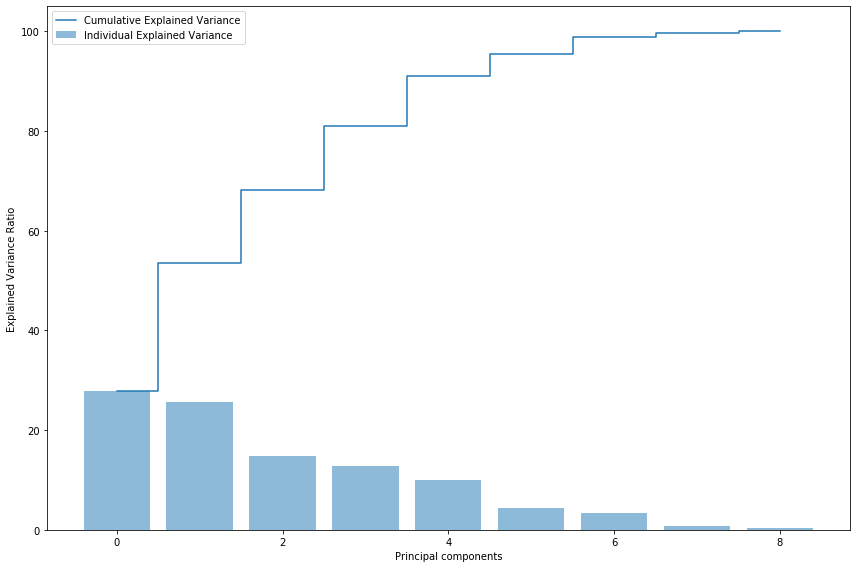

In [283]:
plt.figure(figsize=(12,8))
plt.bar(range(9),var_exp,alpha=0.5,align='center',label='Individual Explained Variance')
plt.step(range(9),cum_var_exp,where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [284]:
from sklearn.decomposition import PCA

##Best number of principal components would be 5 in this case,as 5 PC components are crearly representing almost or more than
#95-96% of variance in the data, which is a good value for model building
##WE will consider 95% variance explanation for building a better and transparent model

In [285]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df1)
pc = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [286]:
pc.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.600546,-0.374789,-0.321530,-0.138974,-0.002354
1,-0.483719,0.057741,-0.051583,-0.190354,-0.057958
2,-0.453541,0.039967,-0.082123,-0.195942,-0.109101
3,-0.517228,0.067674,0.009708,-0.147152,0.034478
4,-0.502619,0.059609,0.001321,-0.158053,0.021870


In [287]:
pc.shape

(214, 5)

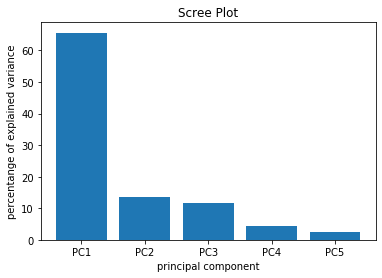

In [288]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()

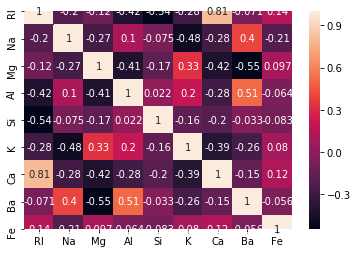

In [289]:
sns.heatmap(df1.corr(),annot=True)

In [290]:
##Now, predicting using the PCs:

In [291]:
import statsmodels.api as sm
X = pc  ##FUll independant variables data
y = df5['Type'] ##Full dependant data
X1 = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=10)

In [293]:
model_compare(lr,X_train,X_test,y_train,y_test)

Accuracy on Train Set 0.6040268456375839
Accuracy on Test Set 0.49230769230769234


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [294]:
model_compare(dt,X_train,X_test,y_train,y_test)

Accuracy on Train Set 1.0
Accuracy on Test Set 0.5692307692307692


In [295]:
model_compare(lgbc,X_train,X_test,y_train,y_test)

Accuracy on Train Set 0.9932885906040269
Accuracy on Test Set 0.5384615384615384


In [296]:
model_compare(rfc,X_train,X_test,y_train,y_test)

Accuracy on Train Set 1.0
Accuracy on Test Set 0.6


In [ ]:
##Light GBM gave a good train accuracy after converting original components to PC components
#if we see LR--better model is the one with original components
##lgbm is better in the case of PC components, since it drastically reduced the difference between train and test accuracy
#values
##at this moment, original LR seems to be the best bet